In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got

In [115]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [9]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [10]:
train_df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [22]:
print(train_df.shape)
train_df.isnull().sum()

(13730, 167)


Unnamed: 0                 0
NU_INSCRICAO               0
NU_ANO                     0
CO_MUNICIPIO_RESIDENCIA    0
NO_MUNICIPIO_RESIDENCIA    0
                          ..
Q046                       0
Q047                       0
Q048                       0
Q049                       0
Q050                       0
Length: 167, dtype: int64

In [105]:
corr = train_df.corr()
corr_list_train = corr["IN_TREINEIRO"][(corr["IN_TREINEIRO"] < -0.15) 
                                 | (corr["IN_TREINEIRO"] >0.15) 
                                 & (correlation['IN_TREINEIRO'] < 1)].index.tolist()
corr_list = corr["IN_TREINEIRO"][(corr["IN_TREINEIRO"] > 0.15) | (corr["IN_TREINEIRO"] < -0.15)].index.tolist()
corr["IN_TREINEIRO"][(corr["IN_TREINEIRO"] < -0.15) 
                                 | (corr["IN_TREINEIRO"] > 0.15) 
                                 & (correlation['IN_TREINEIRO'] < 1)]

NU_IDADE          -0.295091
TP_ST_CONCLUSAO    0.533983
TP_ANO_CONCLUIU   -0.257710
TP_ESCOLA         -0.244562
Name: IN_TREINEIRO, dtype: float64

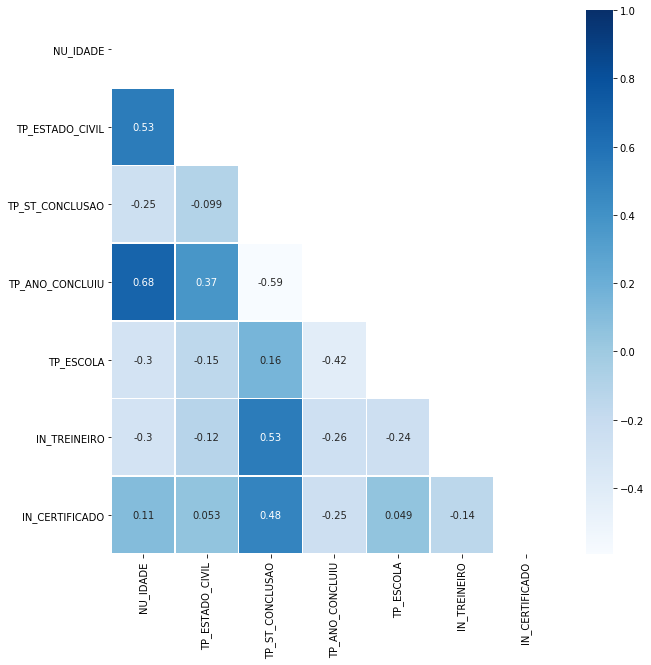

In [52]:
correlation = train_df[corr_list].corr()
plt.figure(figsize=(10,10))
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation,
            mask=mask,
            annot=True,
            cmap='Blues',
            linewidths=.5
            );

In [53]:
train_df[corr_list].isnull().sum()

NU_IDADE             0
TP_ESTADO_CIVIL    528
TP_ST_CONCLUSAO      0
TP_ANO_CONCLUIU      0
TP_ESCOLA            0
IN_TREINEIRO         0
IN_CERTIFICADO       0
dtype: int64

In [54]:
train_df["TP_ESTADO_CIVIL"].unique()

array([ 0., nan,  1.,  2.,  3.])

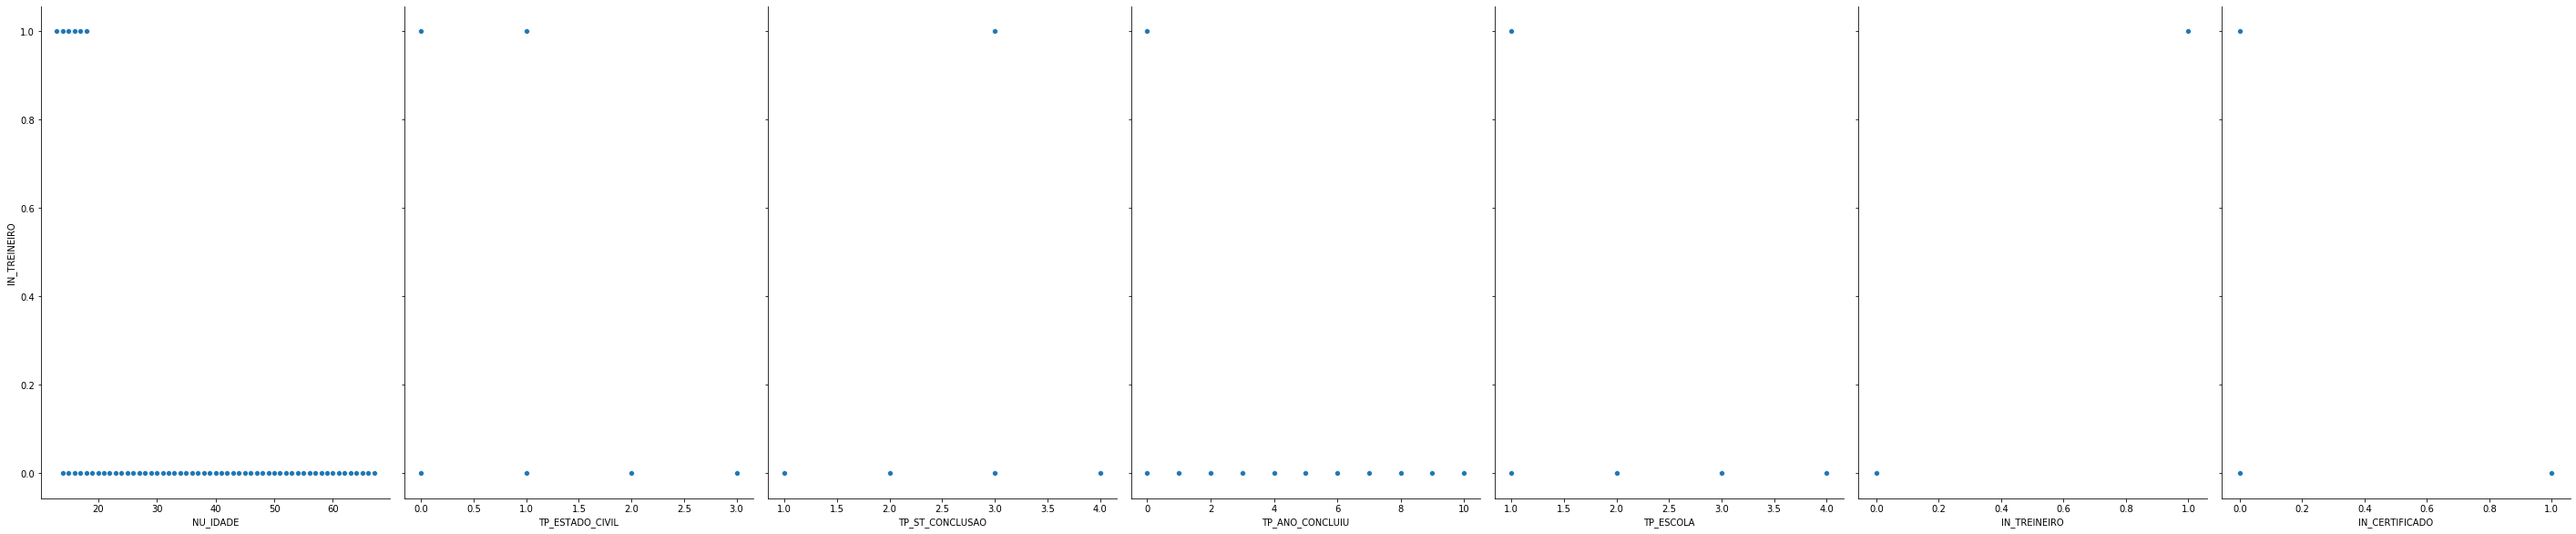

In [55]:
sns.pairplot(train_df, x_vars=corr_list, y_vars='IN_TREINEIRO', height=8, aspect=0.7);

In [106]:
X = train_df[corr_list_train].copy()
y = train_df["IN_TREINEIRO"].copy()
for column in corr_list_train:
    X[column].fillna(0, inplace=True)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [127]:
transform = StandardScaler()
X_train_transformed = transform.fit_transform(X_train)
X_test_transformed = transform.transform(X_test)

X_transformed = transform.fit_transform(X)

In [134]:
penalty = ['l1', 'l2']

C = np.logspace(0, 4, 10)

hyperparameters = dict(C=C, penalty=penalty)

grid_linear = GridSearchCV(LogisticRegression(),
                           hyperparameters, 
                           cv=10,
                           scoring="neg_mean_absolute_error",
                           verbose=2,
                           n_jobs=-1)

In [135]:
model = grid_linear.fit(X_train_transformed, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


In [136]:
model.best_score_

-0.003004552905356915

In [137]:
preds = model.predict(X_test_transformed)
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, preds)))) #Prints THE RMSE (Root Mean Square Error)
print("MSE: %f" % (mean_squared_error(y_test, preds))) #Prints THE MSE (Mean Squared Error)
print("R²: %f" % (r2_score(y_test,preds))) #Prints THE R²(Coefficient of Determination)

RMSE: 0.053975
MSE: 0.002913
R²: 0.974364


## Creating Answer DataFrame

In [114]:
test = test_df[corr_list_train].copy()
test_transformed = transform.transform(test)

In [143]:
preds = model.predict(test_transformed)

In [144]:
answer = pd.DataFrame()
answer["NU_INSCRICAO"] = test_df["NU_INSCRICAO"]
answer["IN_TREINEIRO"] = preds

In [146]:
answer.to_csv('answer.csv', index=False, header=True)